# **BIKE SHARING Assignment - Multiple Linear Regression MODEL **

In [1]:
### Importing required Libraries ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  #VIF
from sklearn .metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the BIKE_Sharing data file from GOOGLE DRIVE (Used Google Colab)
#Checking the first 5 rows in the data file
# Read the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

bike_details=pd.read_csv('/content/drive/MyDrive/day.csv')
bike_details.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##  READING & UNDERSTANDING THE DATA **

In [3]:
# Checking the Information about the file
bike_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# No null entries were found - no further action taken

In [5]:
# Checking the Shape of the file
bike_details.shape

(730, 16)

In [6]:
# Checking the statistical data for the dataframe
bike_details.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Dropping columns which are not relevant / redundant for analysis
# COL 1 - 'instant'  : record index  -  hence not required for analysis
# COL 2 - 'dteday'  : date  - Not relevant for analysis - hence dropping
# COL 6 - 'holiday' : weather day is a holiday or not : This is redundant information . Also caputured in COL 'workingday'
## COL 14 - 'casual'  : count of casual users   and
## COL 15 - 'registered' : count of registered users  sum up to make
## COL 16 - 'cnt' : count of total rental bikes including both casual and registered
## Hence Dropping Col 14 & COL 15  (Redundant Information)
bike_details.drop(['instant','dteday','holiday' , 'casual','registered'],axis=1 , inplace=True)
bike_details.shape

(730, 11)

In [8]:
# Check for duplicates & Drop the recoreds to avoid bias in analysis
bike_details.drop_duplicates(keep= 'first',inplace = True )
bike_details.shape

(730, 11)

In [9]:
# Converting non binary Categorical variabes to original values
#______________________________________________________
# COL 'season' mapping  1:spring, 2:summer, 3:fall, 4:winter to a new COL 'seasons'
# and DROP COL 'season'
bike_details['seasons'] = bike_details['season'].map({1:"spring" , 2:"summer", 3:"fall", 4:"winter"})
bike_details.drop('season',axis=1,inplace=True)
#______________________________________________________

# COL 'mnth' mapping to a new COL 'month' with mapping
#      1 - Jan , 2 - Feb , 3 - Mar , 4 - Apr , 5 - May,6 - Jun ,
#      7 - Jul , 8 - Aug , 9 - Sep , 10 - Oct , 11- Nov , 12 to Dec
# DROP COL 'mnth' post add of new column
bike_details['month'] = bike_details['mnth'].map({1:"Jan" , 2:"Feb", 3:"Mar", 4:"Apr",
            5:"May", 6:"Jun" , 7:"Jul" , 8:"Aug",9:"Sep", 10:"Oct" , 11:"Nov" , 12:"Dec"})
bike_details.drop('mnth',axis=1,inplace=True)

#______________________________________________________
# COL 'weekday' mapping to a new COL 'day' with mapping
# DROP COL 'weekday' post add of new column
bike_details['day'] = bike_details['weekday'].map({0:"Mon" , 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri",5:"Sat",6:"Sun"})
bike_details.drop('weekday',axis=1,inplace=True)

#______________________________________________________
# COL 'weathersit' mapping
#    1: Clear, Few clouds, Partly cloudy, Partly cloudy
#    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog mapping to a new COL 'day' with mapping
# Mapping 'weathersit' to a new col 'weather' mapping 1 to weather_1 , 2 to weather_2 , 3 to weather_3 , 4 to weather_4
# DROP COL 'weathersit' post addition on new COL 'weather'
bike_details['weather'] = bike_details['weathersit'].map({1:"weather_1" , 2:"weather_2", 3:"weather_3", 4:"weather_4"})
bike_details.drop('weathersit',axis=1,inplace=True)

bike_details.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,seasons,month,day,weather
0,0,0,14.110847,18.18125,80.5833,10.749882,985,spring,Jan,Sun,weather_2
1,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Jan,Mon,weather_2
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Jan,Tue,weather_1
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Jan,Wed,weather_1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Jan,Thu,weather_1


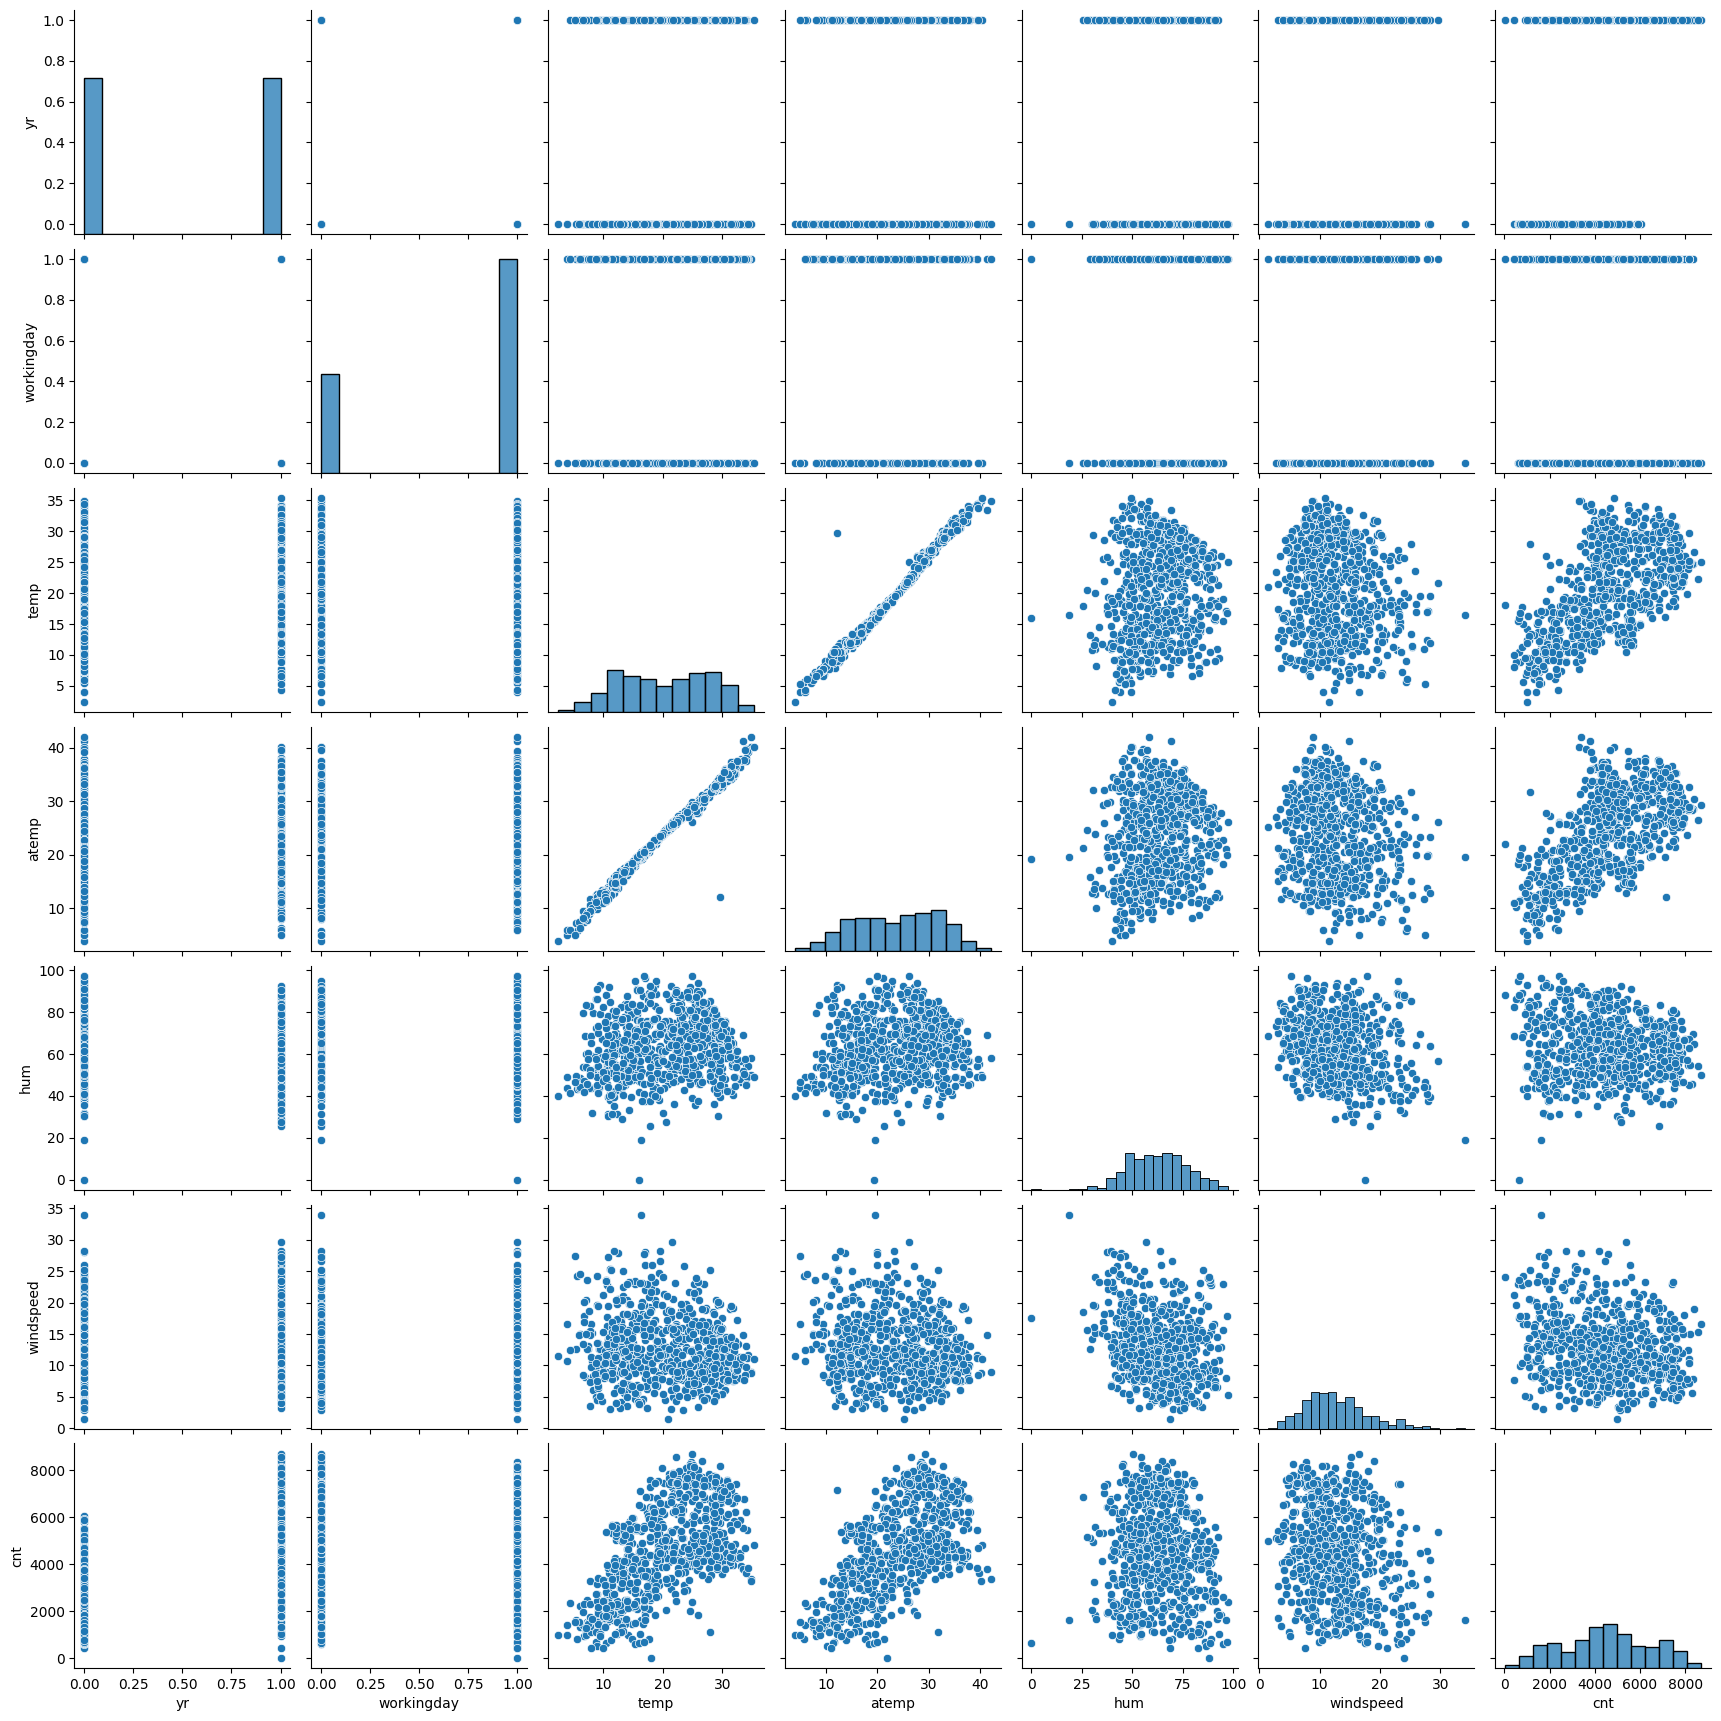

In [10]:
#Visualizing numeric variables
sns.pairplot(bike_details)
plt.show()

<Axes: xlabel='yr', ylabel='cnt'>

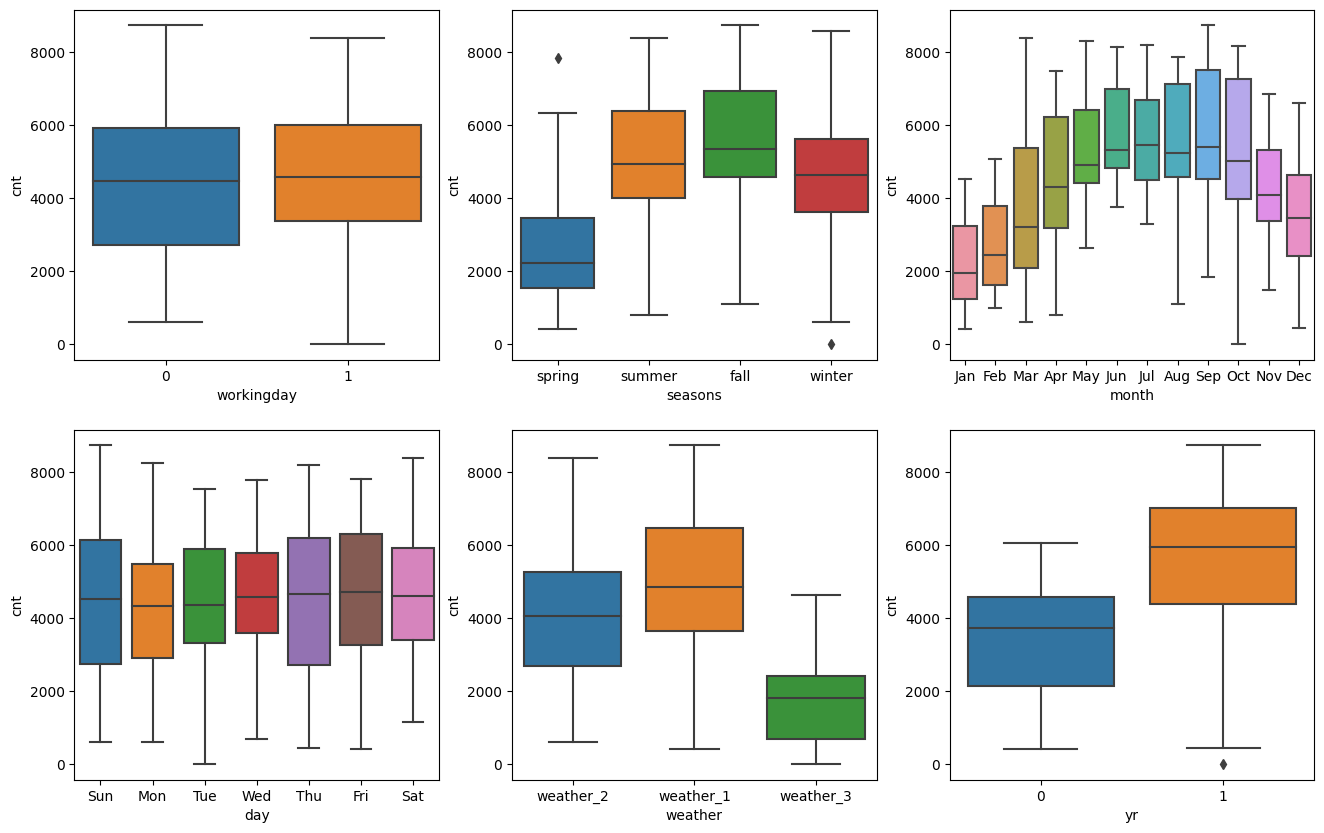

In [11]:
#Visualizing categorical variables
plt.figure(figsize= (16,10))
plt.subplot(2,3,1)
sns.boxplot(x='workingday',y='cnt',data=bike_details)
plt.subplot(2,3,2)
sns.boxplot(x='seasons',y='cnt',data=bike_details)
plt.subplot(2,3,3)
sns.boxplot(x='month',y='cnt',data=bike_details)
plt.subplot(2,3,4)
sns.boxplot(x='day',y='cnt',data=bike_details)
plt.subplot(2,3,5)
sns.boxplot(x='weather',y='cnt',data=bike_details)
plt.subplot(2,3,6)
sns.boxplot(x='yr',y='cnt',data=bike_details)

In [12]:
# From the above data visualization , we see there is no records with value 'weathersit' = 4
# While adding dummies we see 2 columns getting added . Here n=3 , number of dummies = n-1 =2

## **DATA PREPARATION for MODELLING **

In [13]:
# Additing Dummy variable for categorical value
#_______________________________________________________#
# Get the dummies for seasons and store it in a variable for seasons
dummies_seasons = pd.get_dummies(bike_details['seasons'],drop_first= True)
dummies_seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
# Concat the dummy variables with the original dataframe
bike_details = pd.concat([bike_details,dummies_seasons],axis=1)
#drop the 'seasons' column as we have the dummy variable now
bike_details = bike_details.drop('seasons',axis = 1)
bike_details.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,month,day,weather,spring,summer,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,985,Jan,Sun,weather_2,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,Jan,Mon,weather_2,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Tue,weather_1,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Wed,weather_1,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Thu,weather_1,1,0,0


In [15]:
#_____________________________________________________________#
# Get the dummies and store it in a variable for weather
dummies_weather = pd.get_dummies(bike_details['weather'],drop_first= True)
# Concat the dummy variables with the original dataframe
bike_details = pd.concat([bike_details,dummies_weather],axis=1)
#drop the 'Weather' column as we have the dummy variable now
bike_details = bike_details.drop('weather',axis = 1)
bike_details.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,month,day,spring,summer,winter,weather_2,weather_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,Jan,Sun,1,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,Jan,Mon,1,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Tue,1,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Wed,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Thu,1,0,0,0,0


In [16]:
#____________________________________________________________#
# Get the dummies and store it in a variable for weekday
dummies_day = pd.get_dummies(bike_details['day'],drop_first= True)
dummies_day.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [17]:
# Concat the dummy variables with the original dataframe
bike_details = pd.concat([bike_details,dummies_day],axis=1)
#drop the 'day' column as we have the dummy variable now
bike_details = bike_details.drop('day',axis = 1)
bike_details.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,14.110847,18.18125,80.5833,10.749882,985,Jan,1,0,0,1,0,0,0,1,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,Jan,1,0,0,1,0,1,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,1,0,0,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,1,0,0,0,0,0,0,0,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,1,0,0,0,0,0,0,0,1,0,0


In [18]:
#________________________________________________________________________________#
# Get the dummies and store it in a variable for weather
dummies_month = pd.get_dummies(bike_details['month'],drop_first= True)
dummies_month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [19]:
# Concat the dummy variables with the original dataframe
bike_details = pd.concat([bike_details,dummies_month],axis=1)
#drop the 'month' column as we have the dummy variable now
bike_details = bike_details.drop('month',axis = 1)
bike_details.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Train , test split of Data to 70%  & 30 %
df_train , df_test = train_test_split(bike_details,train_size = .7 , random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [21]:
# Rescaling  numeric variables
# Instantiate an object
scaler = MinMaxScaler()
# Create list of only numeric variables which we want to rescale
num_vars = ['temp' , 'atemp' ,'hum', 'windspeed','cnt']
# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

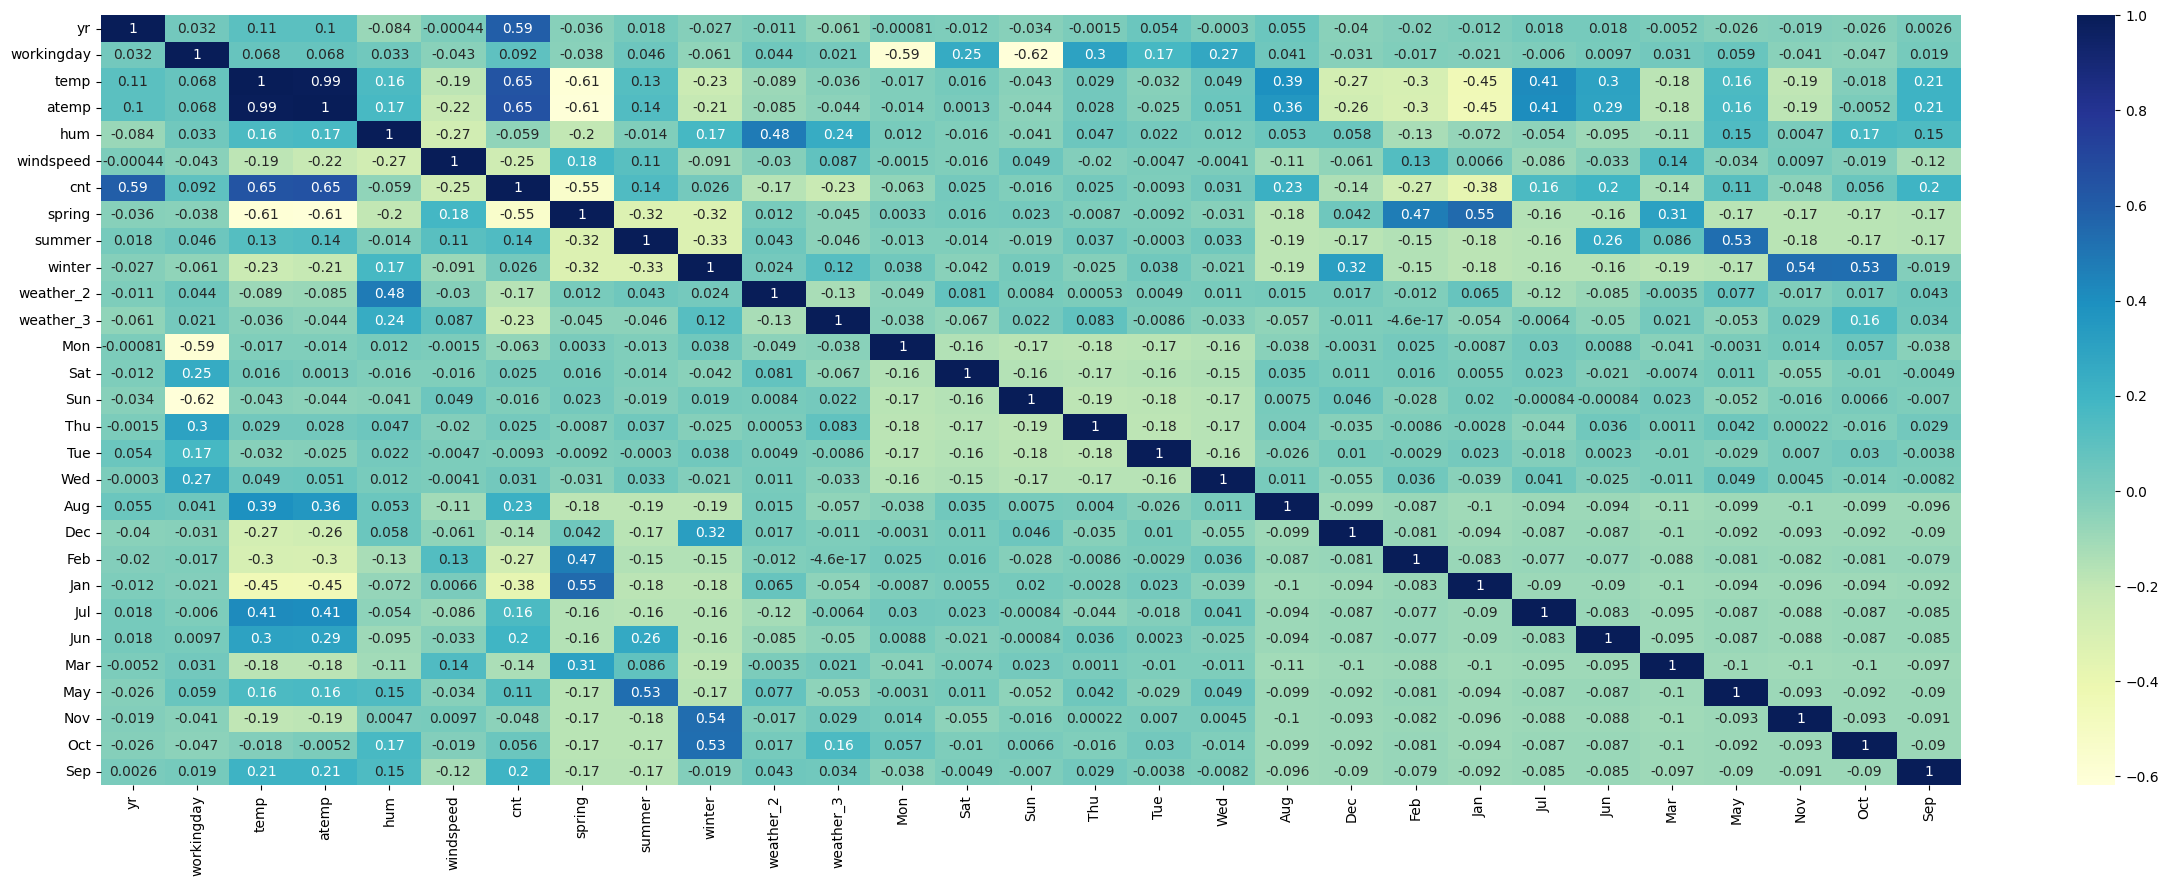

In [22]:
# Chceking the heatmap for coefficients
plt.figure(figsize= (30,10))
sns.heatmap(df_train.corr(),annot=True , cmap = 'YlGnBu')

In [23]:
## Dropping COL based on very HIGH co-relation visible from heat map above
# Dropping 'temp'
df_train = df_train.drop('temp',axis = 1)

In [24]:
### Dividing data set into X & y sets for Model building
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,workingday,atemp,hum,windspeed,spring,summer,winter,weather_2,weather_3,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.318819,0.751824,0.380981,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **BUILDING & TRAINING THE MODEL **

In [25]:
# Building model using Reccursing feature elemination
# Running Linear regression with number of variables as 12
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select = 12, step = 1)   # Running Reccursive feature elemination
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 7),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 13),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 11),
 ('Wed', False, 12),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', False, 10),
 ('Jun', False, 9),
 ('Mar', False, 16),
 ('May', False, 8),
 ('Nov', False, 6),
 ('Oct', False, 14),
 ('Sep', True, 1)]

In [26]:
# Below 12 columns were picked by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'weather_2', 'weather_3', 'Sun', 'Aug', 'Sep'],
      dtype='object')

In [27]:
# Columns Dropped via RFE
col_dropped = X_train.columns[~rfe.support_]
col_dropped

Index(['spring', 'Mon', 'Sat', 'Thu', 'Tue', 'Wed', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [28]:
# Building the model
X_train_rfe = X_train[col]       # Using the selected columns given by RFE

# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Print the Statsmodel summary  of  the Linear regression model built
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.65e-189
Time:                        14:28:08   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1769      0.029      6.121      0.0

In [29]:
# Chcek significance of variables - (P_values)
# check VIF to see multicollinearity & decide if the variable has to be dropped
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values , i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2 )
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
0,const,51.54
4,hum,1.87
2,workingday,1.65
10,Sun,1.65
8,weather_2,1.56
3,atemp,1.51
11,Aug,1.41
6,summer,1.38
7,winter,1.31
9,weather_3,1.24


In [30]:
# The VIF values are all less than 5  except for the constant .
# As CONSTANT is not a Predictor - no action taken .

# **RESIDUAL ANALYSIS ON TRAIN DATA**

Text(0.5, 0, 'Errors')

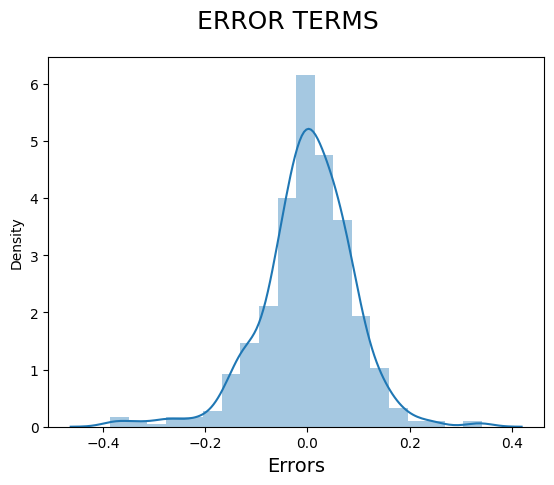

In [31]:
# Residual Analysis of the train data
y_train_cnt = lm.predict(X_train_rfe)
residual = y_train - y_train_cnt

# Plot the histogram of the  error terms
fig = plt.figure()
sns.distplot(residual,bins=20)
fig.suptitle('ERROR TERMS',fontsize=18)
plt.xlabel('Errors',fontsize=14)


In [32]:
# The assumption of  normal distribution of the residual terms are found to hold true for the above plot


# **PREDICTION AND EVALUATION ON TEST SET**

In [33]:
# Make Prdictions and evaluations on Test set
# Create list of only numeric variables which we want to rescale
num_vars = ['temp' , 'atemp' ,'hum', 'windspeed','cnt']
# Use scaler to transform the data in y_test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
y_test = df_test.pop('cnt')
X_test = df_test
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,1.0,0,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#Drop the columns in X_test dataset that were dropped in X-train set
X_test_sm = X_test_sm.drop('temp' , axis = 1)
X_test_sm = X_test_sm.drop(col_dropped , axis = 1)
X_test_sm.head()

,const,yr,workingday,atemp,hum,windspeed,summer,winter,weather_2,weather_3,Sun,Aug,Sep
184,1.0,0,0,0.769660,0.657364,0.084219,0,0,1,0,0,0,0
535,1.0,1,1,0.842587,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,1,0.496145,0.837699,0.334206,0,1,1,0,0,0,0
221,1.0,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,1,0
152,1.0,0,1,0.741471,0.314298,0.537414,1,0,0,0,0,0,0


In [37]:
# Making Prediction
y_test_pred = lm.predict(X_test_sm)

#Evaluate the model
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8115122208678753

> R2 of TRAIN set
    - .84

> R2 of TEST set
    - .81

The model is behaving good as we get less than 5% variance between Train & Test sets using the Multiple Linear regression model